In [1]:
import numpy as np 
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.pyplot import show

#
import statsmodels.formula.api as sm
import statsmodels.api as smapi

In [2]:
#df=pd.read_csv("ks-projects-201801.csv") # arrick
df=pd.read_csv("ks-projects-201801.csv\ks-projects-201801.csv") # changed
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
output_folder = "./jason_output/"

In [10]:
def calculate_categorical_data_success_rates(data, category):
    category_data = data[['state'] + category]
    #print(category_data)
    
    category_totals = category_data.groupby(category).size()
    category_survival_totals = category_data[category_data.state == 'successful'].groupby(category).size()
    
    append_zero_for_missing_indices(category_totals, category_survival_totals)
    
    survival_rates = category_survival_totals/category_totals
    survival_rates.name = "Success Rates"
    
    print(survival_rates)
    return survival_rates

def append_zero_for_missing_indices(data1, data2):
    missing_indices = data1.index.difference(data2.index)
    for index in missing_indices:
        data2.loc[index] = 0
        
def plot_success_rate(data, column, xsize, ysize, filepath):
    success_rate = calculate_categorical_data_success_rates(data, column)
    fig = plt.figure(figsize=(xsize,ysize))
    success_rate.plot.bar(yticks=[0,0.2,0.4,0.6,0.8,1.0])
    plt.savefig(fname=filepath)

In [9]:
def calculate_numerical_data_survival_rates(data, category, minimum, maximum, number_intervals):
    #survival_header = 'Survived'
    category_data = data[['state',category]]
    #survivors_data = category_data[category_data[survival_header]==1]
    #survivors_data = get_survivor_rows(category_data)
    survivors_data = category_data[category_data['state'] == 'successful']
    #print(survived_data)
    
    category_column_totals = category_data[category]
    category_column_survivors = survivors_data[category]
    
    bins = np.linspace(minimum, maximum, number_intervals+1, endpoint=True)

    cats_totals = pd.cut(category_column_totals, bins)
    cats_survivors = pd.cut(category_column_survivors, bins)
    
    tally_survivors = pd.value_counts(cats_survivors)
    tally_totals = pd.value_counts(cats_totals)
    
    tally_survivors.name = 'Success Totals'
    print(tally_survivors)
    
    tally_totals.name ="Totals" 
    print(tally_totals)
    
    survival_rates = tally_survivors/tally_totals
    survival_rates = survival_rates.apply(lambda s: 0 if np.isnan(s) or np.isinf(s) else s)
    survival_rates.name = "Success Rates"
    return survival_rates

def get_ceil_of_max(data, category):
    return math.ceil(data[category].max(0))

def get_floor_of_min(data, category):
    return math.floor(data[category].min(0))

def plot_success_rate_numerical(data, column, minimum, maximum, number_intervals, xsize, ysize, filepath):
    success_rate = calculate_numerical_data_survival_rates(data, column, minimum, maximum, number_intervals)
    fig = plt.figure(figsize=(xsize,ysize))
    success_rate.plot.bar(yticks=[0,0.2,0.4,0.6,0.8,1.0])
    plt.savefig(fname=filepath)

In [6]:
def correlation_scatterplot(data, col1, col2, filepath):
    print("correlation:" + str(data[col1].corr(data[col2])))
    sns.lmplot(x=col1,y=col2,data=data,fit_reg=True)
    plt.savefig(filepath)

# Plot of Success Rates - Categorical Variables

main_category
Art             0.408837
Comics          0.539976
Crafts          0.240095
Dance           0.620488
Design          0.350848
Fashion         0.245135
Film & Video    0.371518
Food            0.247338
Games           0.355312
Journalism      0.212829
Music           0.466062
Photography     0.306615
Publishing      0.308472
Technology      0.197550
Theater         0.598735
Name: Success Rates, dtype: float64


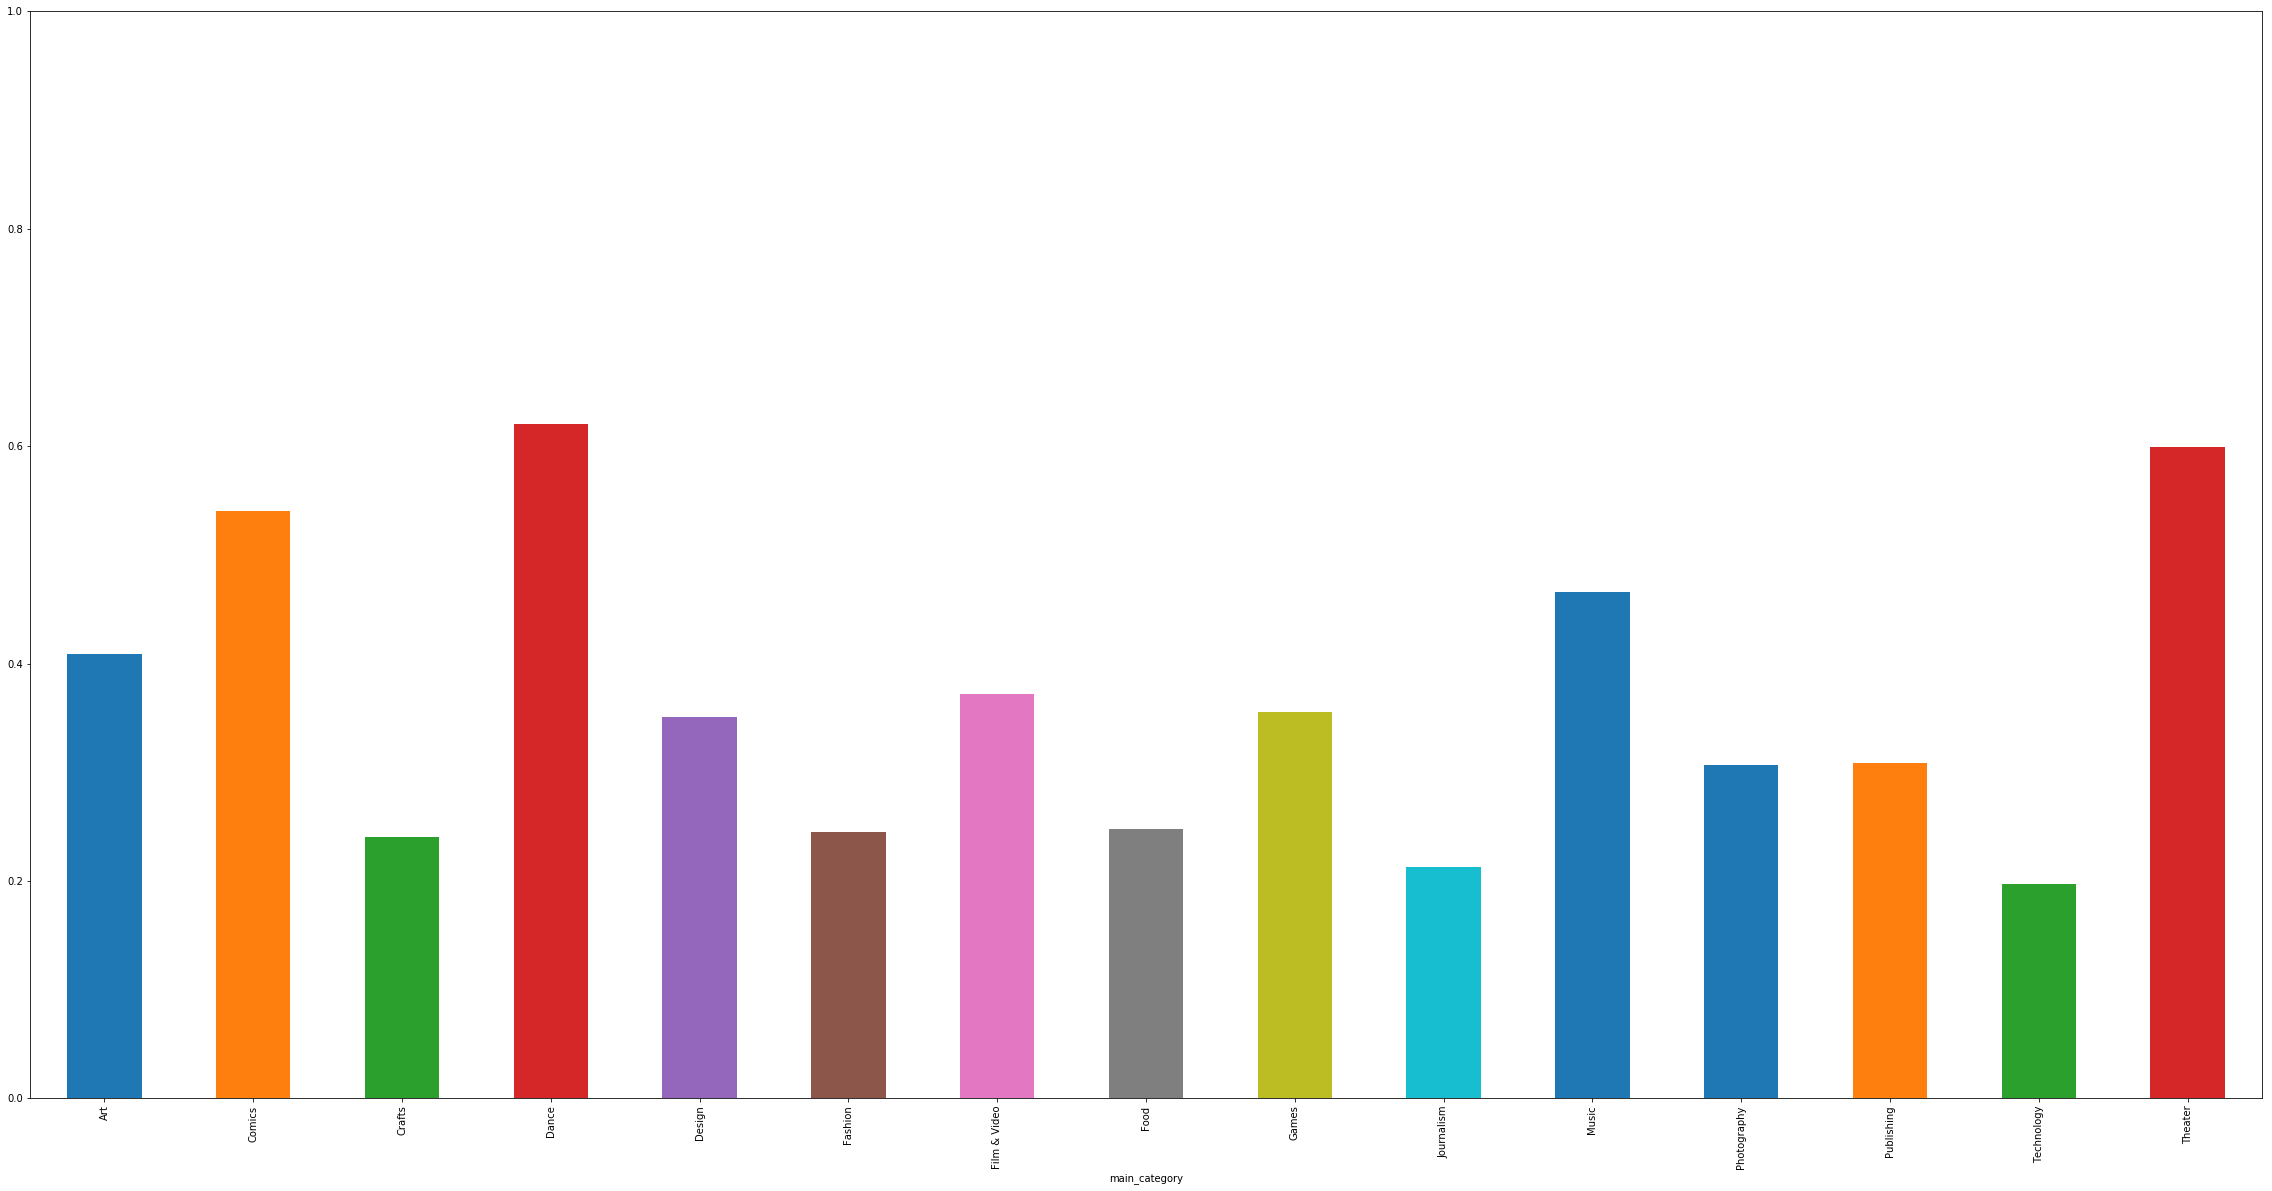

In [11]:
plot_success_rate(df, ['main_category'], 40 , 20, output_folder + "main_category_success_rates.pdf")

main_category  category         
Art            Art                  0.410154
               Ceramics             0.432787
               Conceptual Art       0.355340
               Digital Art          0.275632
               Illustration         0.512126
               Installations        0.483402
               Mixed Media          0.342764
               Painting             0.348816
               Performance Art      0.433612
               Public Art           0.501462
               Sculpture            0.385635
               Textiles             0.278986
               Video Art            0.262887
Comics         Anthologies          0.748148
               Comic Books          0.588407
               Comics               0.501601
               Events               0.306748
               Graphic Novels       0.542382
               Webcomics            0.552469
Crafts         Candles              0.128205
               Crafts               0.249142
               Crochet

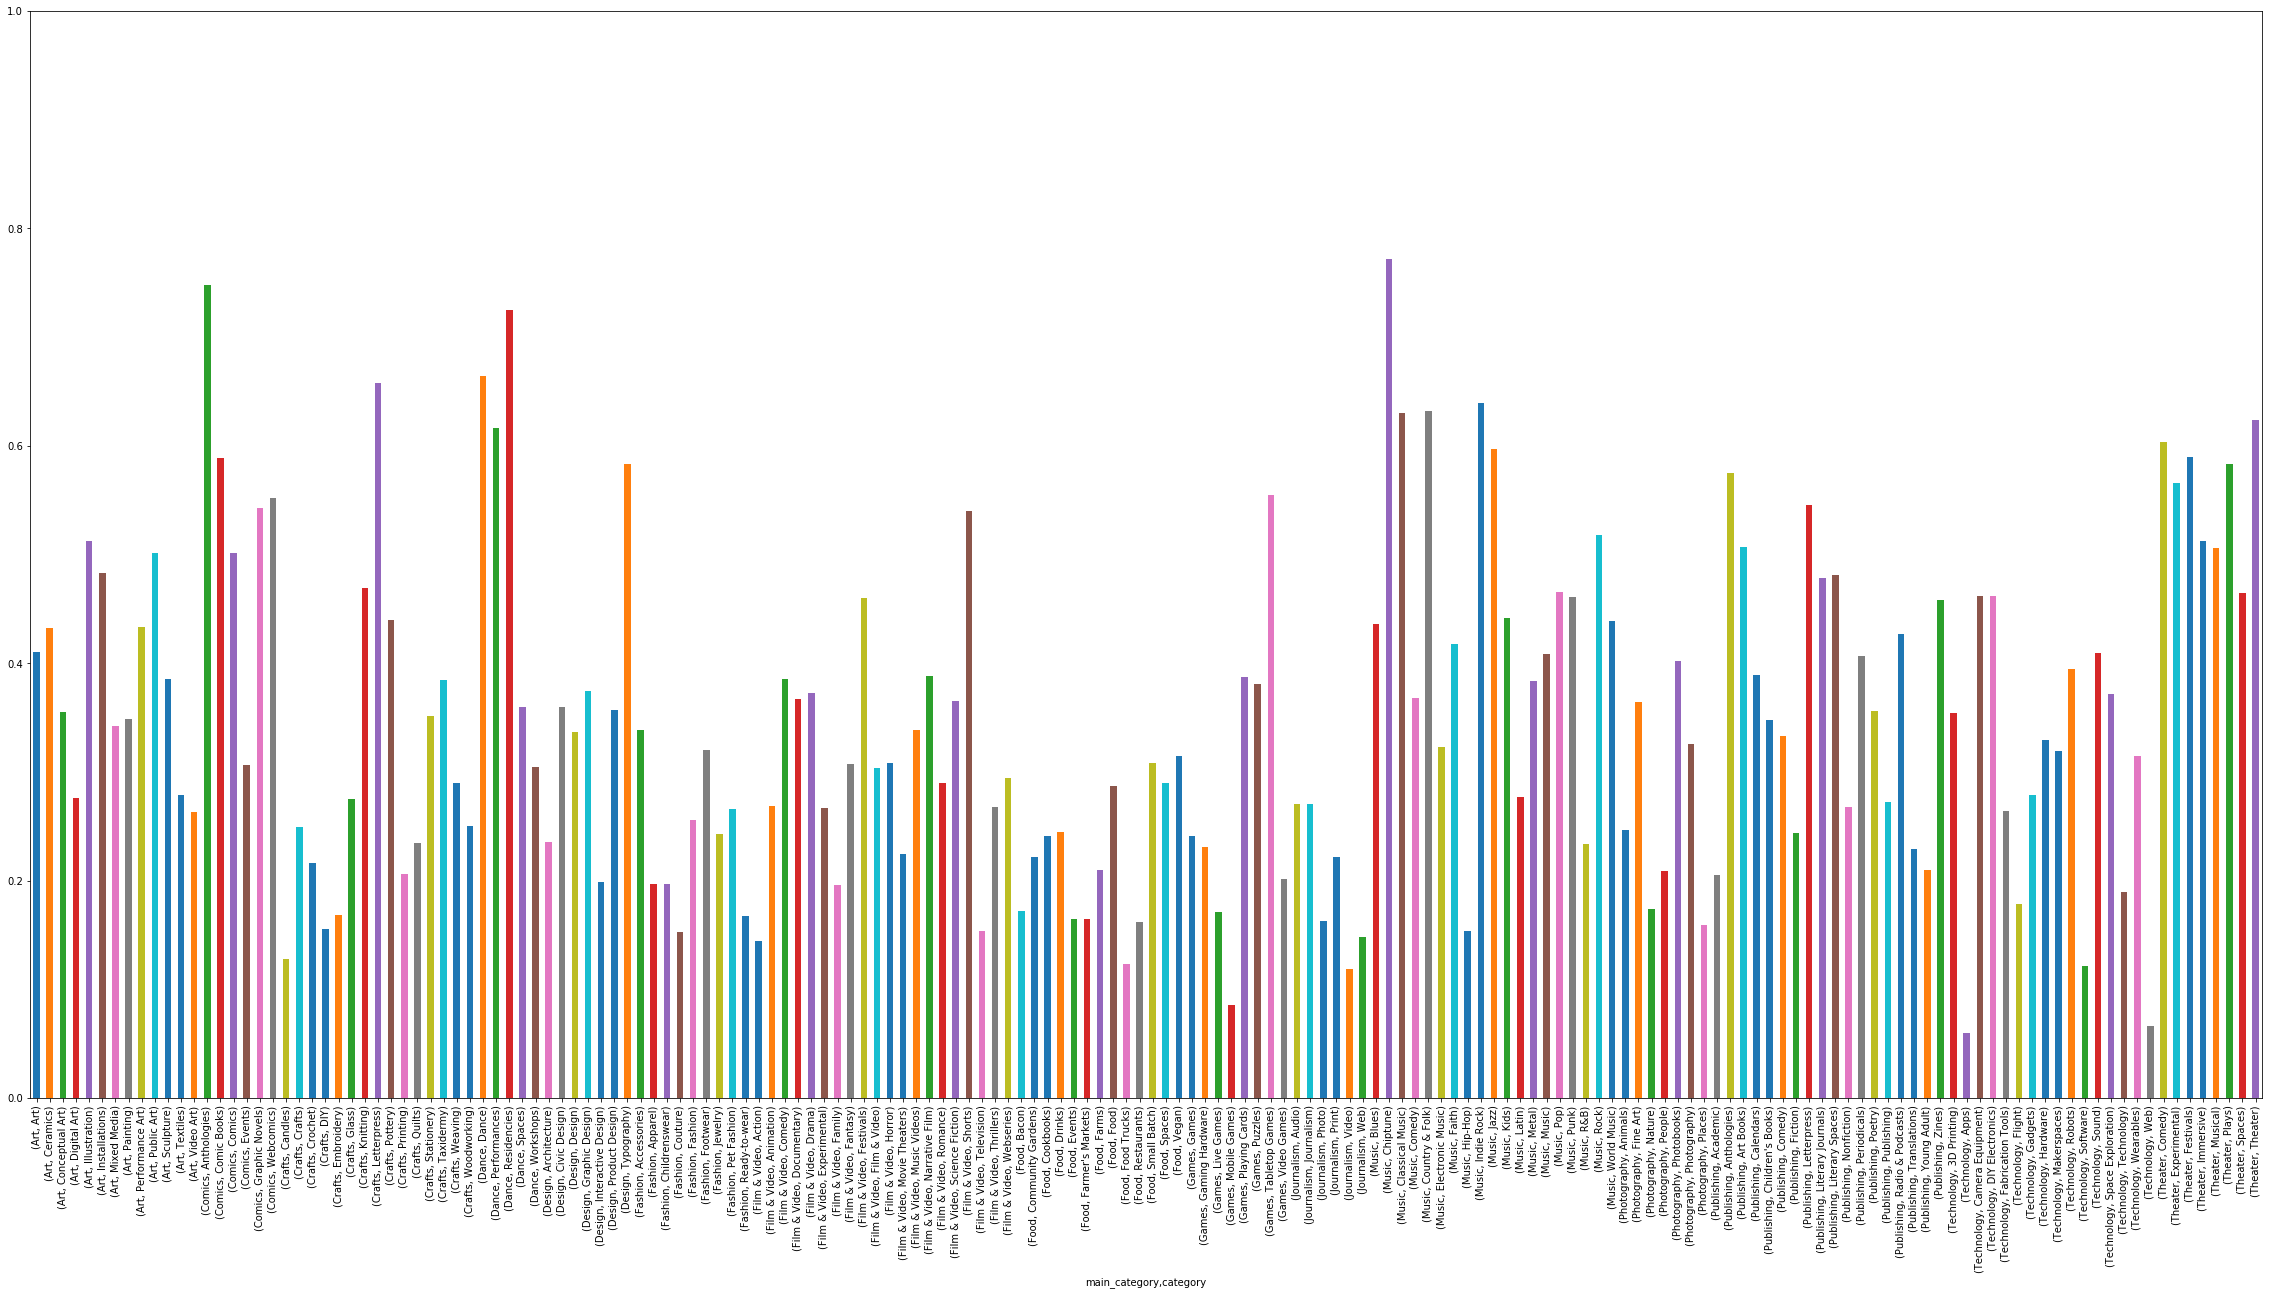

In [12]:
plot_success_rate(df, ['main_category', 'category'], 40, 20, output_folder + "sub_category_success_rates.pdf")

currency
AUD    0.252956
CAD    0.276500
CHF    0.243490
DKK    0.320638
EUR    0.223039
GBP    0.353949
HKD    0.349515
JPY    0.175000
MXN    0.226027
NOK    0.225762
NZD    0.303729
SEK    0.284676
SGD    0.320721
USD    0.370318
Name: Success Rates, dtype: float64


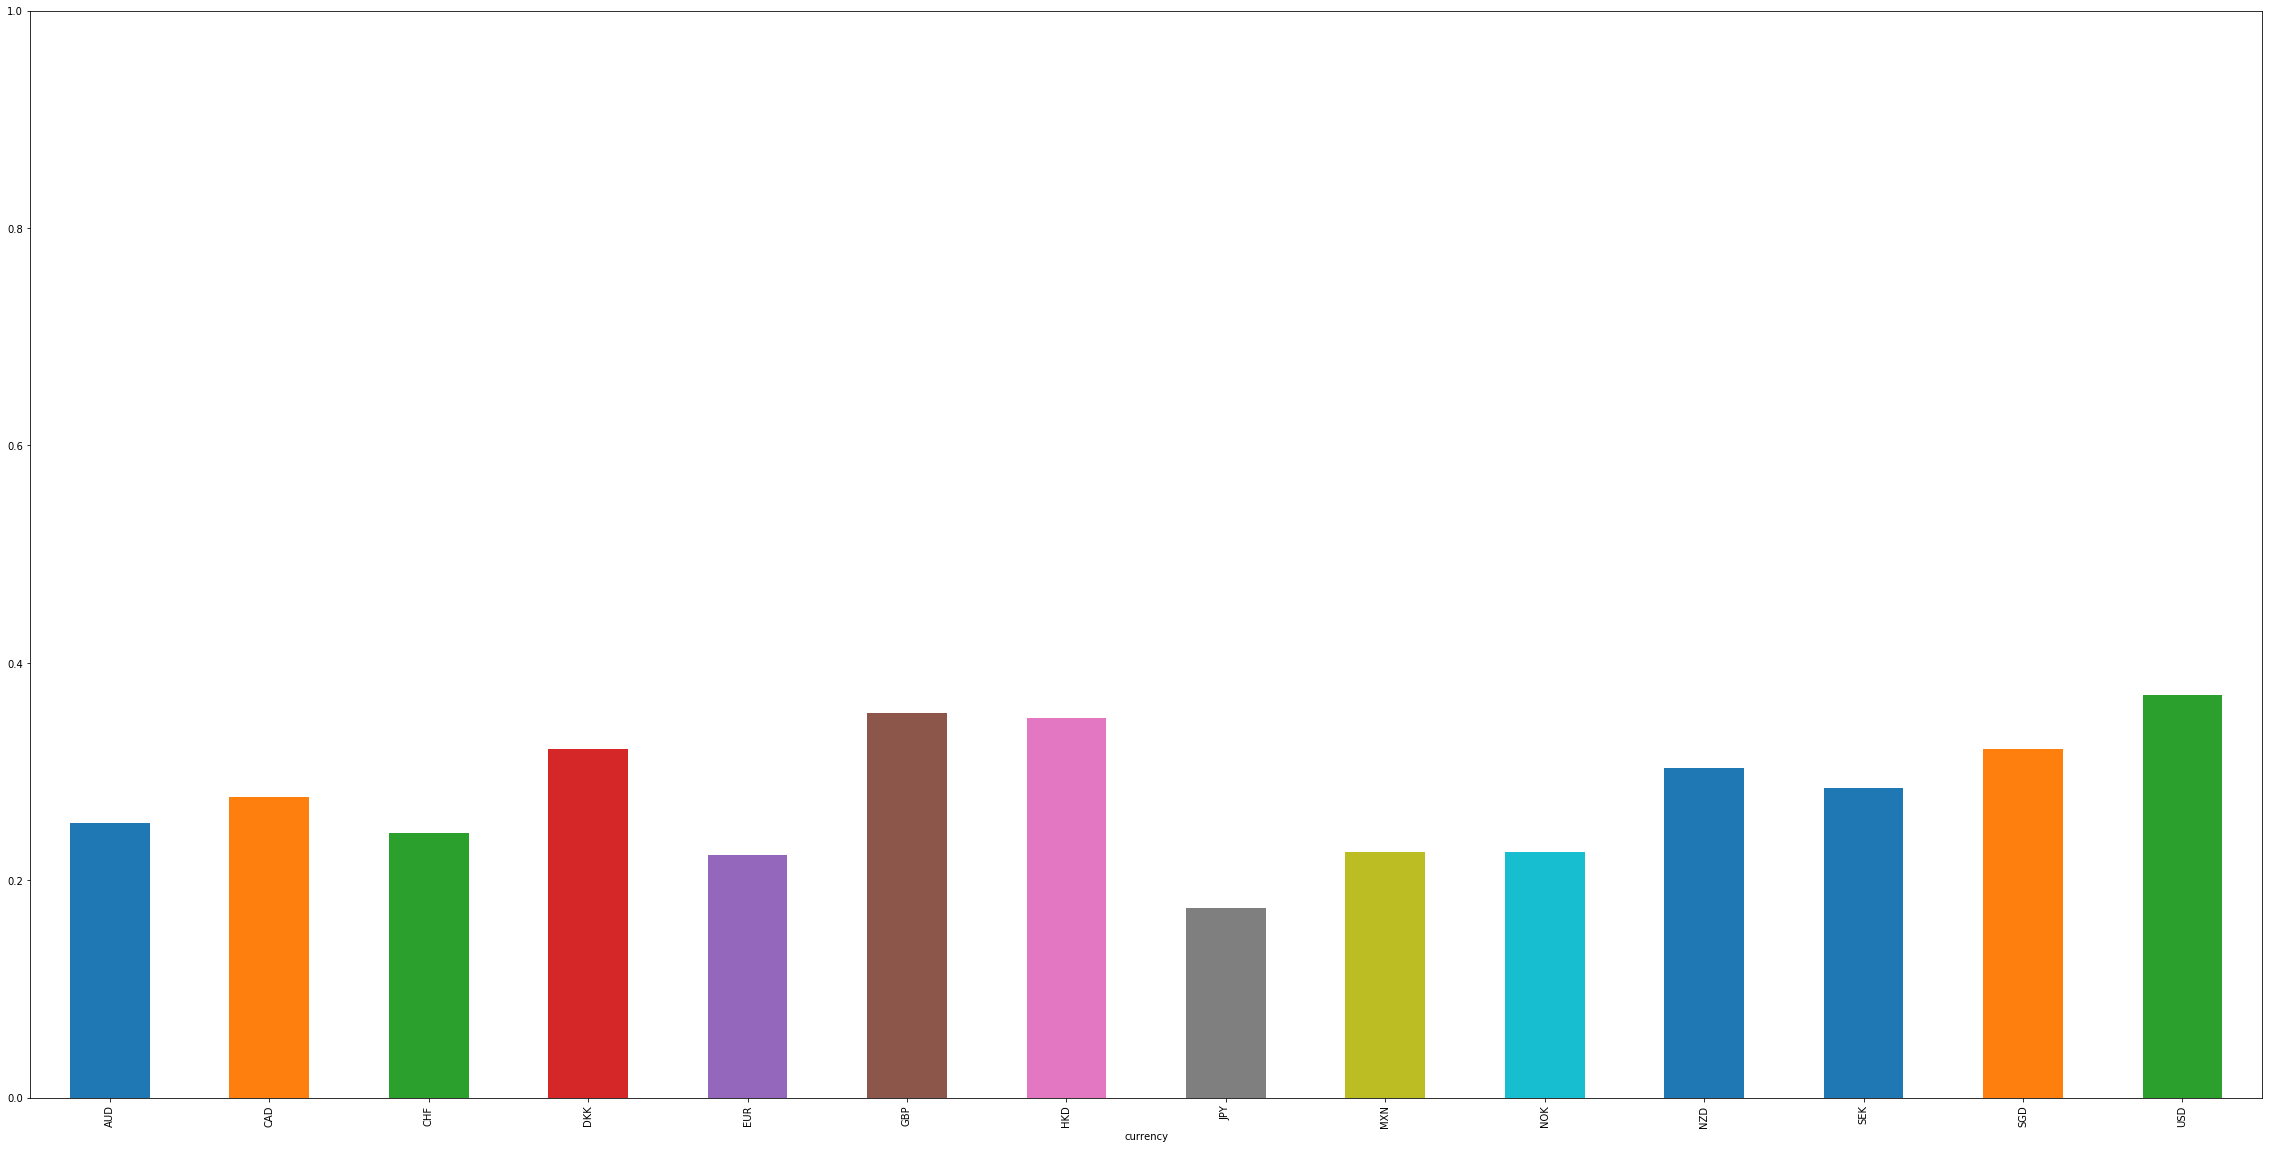

In [13]:
plot_success_rate(df, ['currency'], 40, 20, output_folder + "currency_success_rates.pdf")

country
AT      0.179229
AU      0.256410
BE      0.246353
CA      0.280157
CH      0.245729
DE      0.224646
DK      0.323450
ES      0.216169
FR      0.308949
GB      0.358369
HK      0.349515
IE      0.255240
IT      0.152536
JP      0.175000
LU      0.306452
MX      0.226027
N,0"    0.027653
NL      0.215132
NO      0.228814
NZ      0.309606
SE      0.289698
SG      0.320721
US      0.373510
Name: Success Rates, dtype: float64


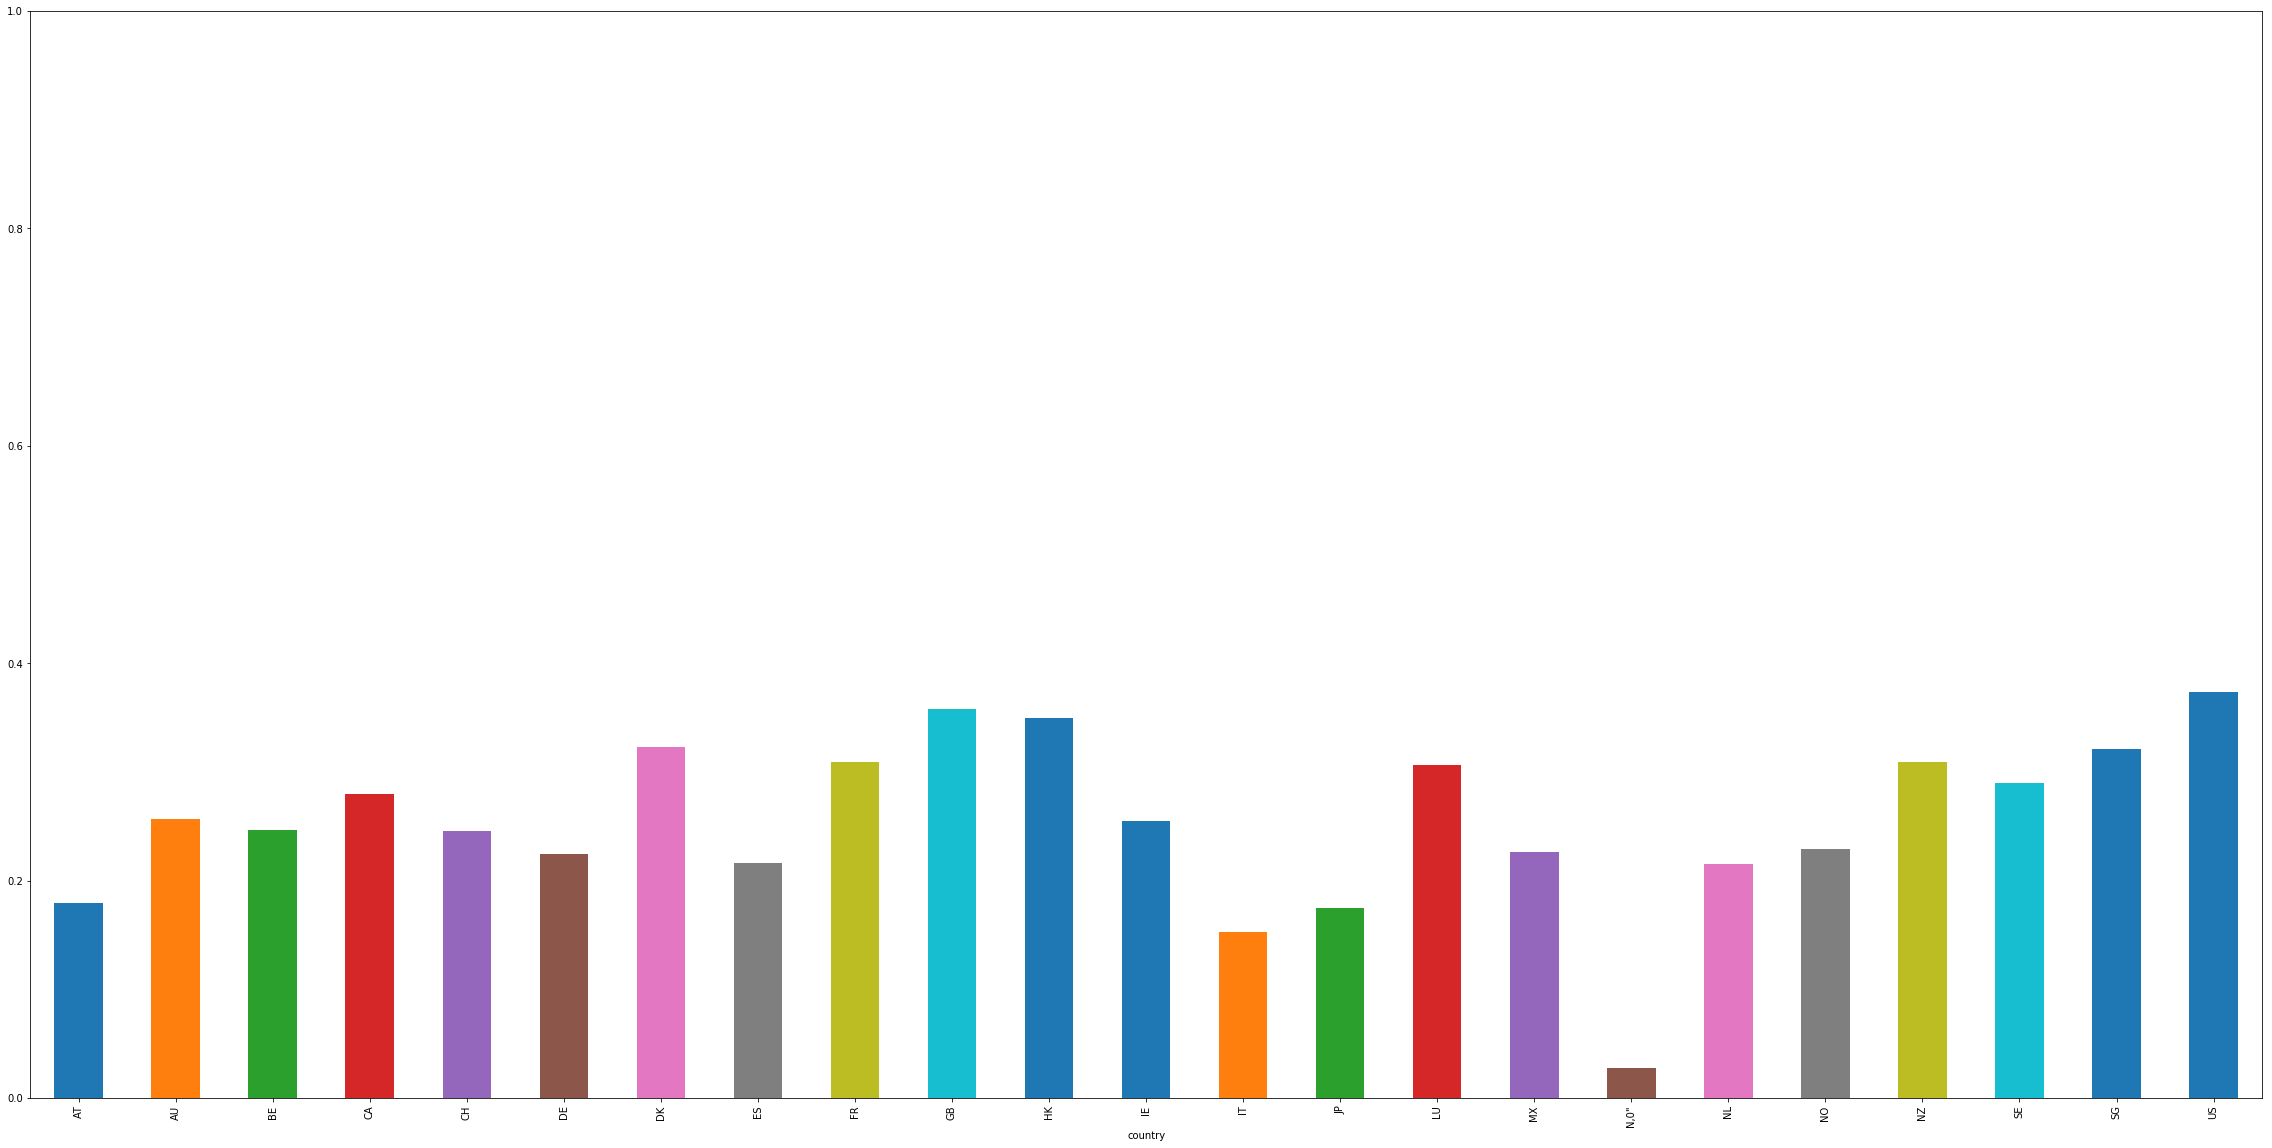

In [14]:
plot_success_rate(df, ['country'], 40, 20, output_folder + 'country_success_rates.pdf')

# Adding Custom Columns

Custom columns:<br>
deadline_date - change string for deadline to datetime<br>
launch_date - changestring for launch to datetime<br>
timedelta - how long was the fundraising, timedelta object<br>
timedelta_days - how long was the fundraising in days, integer<br>
pledged_ratio - the ratio of how much was pledged to the goal<br>
state_ordinal - dummy variable, 1 if successful else 0<br>
backer_pledge_average - average a backer pledge for project<br>
backer_pledge_average_percent - the ratio of that the average a backer pledged for project to the goal<br>

In [15]:
df2 = df.copy()
df2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [16]:
df2['deadline_date'] = pd.to_datetime(df2['deadline'], format="%Y-%m-%d")
df2['launched_date'] = pd.to_datetime(df2['launched'], format="%Y-%m-%d %H:%M:%S")
df2['timedelta'] = df2['deadline_date'] - df2['launched_date']
df2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_date,launched_date,timedelta
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,2016-04-01,2016-02-26 13:38:27,34 days 10:21:33
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,2014-12-21,2014-12-01 18:30:44,19 days 05:29:16
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,2016-03-17,2016-02-01 20:05:12,44 days 03:54:48
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,2014-05-29,2014-04-24 18:14:43,34 days 05:45:17
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,2014-08-10,2014-07-11 21:55:48,29 days 02:04:12


In [17]:
df2['timedelta_days'] = df2['timedelta'].dt.days # total_seconds
print(df2['timedelta'].min())
print(df2['timedelta'].max())
df2[df2['timedelta'].max()==df2['timedelta']]

0 days 00:07:17
16738 days 23:00:00


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_date,launched_date,timedelta,timedelta_days
319002,69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.0,suspended,0,CH,0.0,0.0,1905.97,2015-10-31,1970-01-01 01:00:00,16738 days 23:00:00,16738


In [18]:
df2['pledged_ratio'] = df2['usd_pledged_real']/df2['usd_goal_real']
print(df2['timedelta'])
df2

0        58 days 11:47:32
1        59 days 19:16:03
2        44 days 23:39:10
3        29 days 20:35:49
4        55 days 15:24:57
5        34 days 10:21:33
6        19 days 05:29:16
7        44 days 03:54:48
8        34 days 05:45:17
9        29 days 02:04:12
10       29 days 05:40:23
11       29 days 17:17:02
12       29 days 06:48:10
13       44 days 00:58:48
14       27 days 04:15:42
15       29 days 21:49:07
16       29 days 01:32:08
17       29 days 02:39:06
18       14 days 09:48:28
19       29 days 06:35:28
20       34 days 16:53:49
21       29 days 22:39:40
22       29 days 13:49:22
23       29 days 04:42:27
24       19 days 06:44:10
25       29 days 00:43:10
26       29 days 03:50:54
27       29 days 05:58:00
28       29 days 07:00:31
29       29 days 06:48:27
               ...       
378631   29 days 04:06:10
378632   29 days 00:09:26
378633   29 days 06:43:43
378634   60 days 21:16:01
378635   29 days 01:22:46
378636   29 days 06:09:48
378637   44 days 17:02:32
378638   30 

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_date,launched_date,timedelta,timedelta_days,pledged_ratio
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32,58,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03,59,0.080700
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10,44,0.004889
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49,29,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57,55,0.065795
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00,2016-04-01,2016-02-26 13:38:27,34 days 10:21:33,34,1.047500
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00,2014-12-21,2014-12-01 18:30:44,19 days 05:29:16,19,1.205000
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00,2016-03-17,2016-02-01 20:05:12,44 days 03:54:48,44,0.018120
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00,2014-05-29,2014-04-24 18:14:43,34 days 05:45:17,34,0.065864
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00,2014-08-10,2014-07-11 21:55:48,29 days 02:04:12,29,0.096009


In [19]:
df2['state_ordinal'] = df2['state'].apply(lambda state: 1 if state == 'successful' else 0)
df2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,country,usd pledged,usd_pledged_real,usd_goal_real,deadline_date,launched_date,timedelta,timedelta_days,pledged_ratio,state_ordinal
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,...,GB,0.00,0.00,1533.95,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32,58,0.000000,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,...,US,100.00,2421.00,30000.00,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03,59,0.080700,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,...,US,220.00,220.00,45000.00,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10,44,0.004889,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,...,US,1.00,1.00,5000.00,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49,29,0.000200,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,...,US,1283.00,1283.00,19500.00,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57,55,0.065795,0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,...,US,52375.00,52375.00,50000.00,2016-04-01,2016-02-26 13:38:27,34 days 10:21:33,34,1.047500,1
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,...,US,1205.00,1205.00,1000.00,2014-12-21,2014-12-01 18:30:44,19 days 05:29:16,19,1.205000,1
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,...,US,453.00,453.00,25000.00,2016-03-17,2016-02-01 20:05:12,44 days 03:54:48,44,0.018120,0
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,...,US,8233.00,8233.00,125000.00,2014-05-29,2014-04-24 18:14:43,34 days 05:45:17,34,0.065864,0
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,...,US,6240.57,6240.57,65000.00,2014-08-10,2014-07-11 21:55:48,29 days 02:04:12,29,0.096009,0


In [20]:
df2['backer_pledge_average'] = df2['usd_pledged_real']/df2['backers']
df2['backer_pledge_average'] = df2['backer_pledge_average'].apply(lambda avg: 0 if np.isnan(avg) or np.isinf(avg) else avg)

In [21]:
df2['backer_pledge_average_percent'] = df2['backer_pledge_average'] / df2['usd_goal_real']


In [22]:
df2

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_pledged_real,usd_goal_real,deadline_date,launched_date,timedelta,timedelta_days,pledged_ratio,state_ordinal,backer_pledge_average,backer_pledge_average_percent
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,...,0.00,1533.95,2015-10-09,2015-08-11 12:12:28,58 days 11:47:32,58,0.000000,0,0.000000,0.000000
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,...,2421.00,30000.00,2017-11-01,2017-09-02 04:43:57,59 days 19:16:03,59,0.080700,0,161.400000,0.005380
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,...,220.00,45000.00,2013-02-26,2013-01-12 00:20:50,44 days 23:39:10,44,0.004889,0,73.333333,0.001630
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,...,1.00,5000.00,2012-04-16,2012-03-17 03:24:11,29 days 20:35:49,29,0.000200,0,1.000000,0.000200
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,...,1283.00,19500.00,2015-08-29,2015-07-04 08:35:03,55 days 15:24:57,55,0.065795,0,91.642857,0.004700
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,...,52375.00,50000.00,2016-04-01,2016-02-26 13:38:27,34 days 10:21:33,34,1.047500,1,233.816964,0.004676
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,...,1205.00,1000.00,2014-12-21,2014-12-01 18:30:44,19 days 05:29:16,19,1.205000,1,75.312500,0.075313
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,...,453.00,25000.00,2016-03-17,2016-02-01 20:05:12,44 days 03:54:48,44,0.018120,0,11.325000,0.000453
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,...,8233.00,125000.00,2014-05-29,2014-04-24 18:14:43,34 days 05:45:17,34,0.065864,0,141.948276,0.001136
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,...,6240.57,65000.00,2014-08-10,2014-07-11 21:55:48,29 days 02:04:12,29,0.096009,0,145.129535,0.002233


In [23]:
df2.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'deadline_date',
       'launched_date', 'timedelta', 'timedelta_days', 'pledged_ratio',
       'state_ordinal', 'backer_pledge_average',
       'backer_pledge_average_percent'],
      dtype='object')

# Plot of Success Rates - Numerical Variables

# Time vs Pledged Ratio

all of the dataset

correlation:0.0003937674579422245


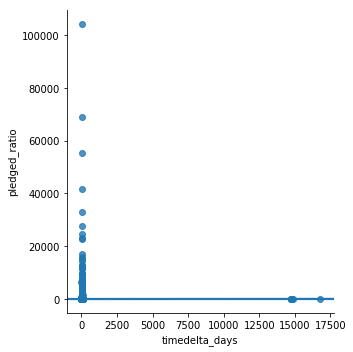

In [24]:
correlation_scatterplot(df2, 'timedelta_days', 'pledged_ratio', output_folder + "time_vs_pledge_ratio_all.pdf")

noticed that overwhelming number of projects are at timedelta_days<2500 , below has outliers removed

In [ ]:
df3 = df2[df2['timedelta_days']<10000]

In [ ]:
correlation_scatterplot(df3, 'timedelta_days', 'pledged_ratio', output_folder + "time_vs_pledge_ratio_without_outliers.pdf")

Looking only at the projects that were successful

In [ ]:
df4 = df2[(df2['timedelta_days']<10000) & (df2['pledged_ratio'] > 1.0)]

In [ ]:
correlation_scatterplot(df4, 'timedelta_days', 'pledged_ratio', output_folder + "time_vs_pledge_ratio_success_cases.pdf")

Looking at the projects that were NOT immensely successful, ie i guess we can them"normal projects"

In [ ]:
df5 = df2[(df2['timedelta_days']<10000) & (df2['pledged_ratio'] < 2.0)]

In [ ]:
correlation_scatterplot(df5, 'timedelta_days', 'pledged_ratio', output_folder + "time_vs_pledge_ratio_normal_cases.pdf")

# Backer Stats vs Success

all 3 checks are used to see if # of backers imply success

## Number of Backers vs Pledged Ratio

regular correlation check

backers
backer_pledge_average - average a backer pledge for project<br>
backer_pledge_average_percent - the ratio of that the average a backer pledged for project to the goal<br>

In [ ]:
print(df2['backers'].max())
print(df2['backers'].min())

In [ ]:
plot_success_rate_numerical(df2, 'backers', 0, 220000, int(220000/25), 300, 50, output_folder +"backers_success_rate.pdf")

In [ ]:
correlation_scatterplot(df2, 'backers', 'pledged_ratio', output_folder + "backers_vs_pledge_ratio.pdf")

## Average pledged by backer vs Pledged Ratio

A higher average would imply less backers and vice versa

In [ ]:
print(df2['backer_pledge_average'].max())
print(df2['backer_pledge_average'].min())

In [ ]:
plot_success_rate_numerical(df2, 'backer_pledge_average', 0, 50000, int(50000/50), 150, 50, output_folder +"average+backers_pledge_success_rate.pdf")

In [ ]:
correlation_scatterplot(df2, 'backer_pledge_average', 'pledged_ratio', output_folder + "average_backers_pledge_vs_pledge_ratio.pdf")

## Average Pledged Ratio to Goal by Backers vs Pledged Ratio

like the average but relative to the goal amount

In [ ]:
print(df2['backer_pledge_average_percent'].max())
print(df2['backer_pledge_average_percent'].min())

In [ ]:
plot_success_rate_numerical(df2, 'backer_pledge_average_percent', 0, 1700, int(1700/10), 150, 50, output_folder +"average_backers_pledge_ratio_success_rate.pdf")

In [ ]:
correlation_scatterplot(df2, 'backer_pledge_average_percent', 'pledged_ratio', output_folder + "average_backers_pledge_ratio_vs_pledge_ratio.pdf")

# Goal vs Pledged Ratio

does bigger goals imply less chance for success?

In [ ]:
print(df2['usd_goal_real'].max())
print(df2['usd_goal_real'].min())
df2[df2['usd_goal_real'] == df2['usd_goal_real'].max()]

In [ ]:
# if this does not finishes running, just use the below cell
plot_success_rate_numerical(df2, 'usd_goal_real', 0, 100000000, int(100000000/1000), 150, 50, output_folder + "goal_success_rate.pdf")

In [ ]:
calculate_numerical_data_survival_rates(df2, 'usd_goal_real', 0, 100000000, int(100000000/1000))

In [ ]:
correlation_scatterplot(df2, 'usd_goal_real', 'pledged_ratio',output_folder +"goal_vs_pledged_ratio.pdf")

# Regression

Expect this model to be bad due to what we observed above.  Just doing this, to see the outputed model.

In [ ]:
df2.columns

In [ ]:
df_reg = df2.copy()
df_reg['y-intercept'] = np.ones((len(df_reg),))
Y = df_reg['pledged_ratio']
X = df_reg[['timedelta_days','usd_goal_real', 'y-intercept']]
result = sm.OLS( Y, X ).fit()
result.summary()